In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Import data, build the df:

import pandas as pd
import numpy as np

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Read in data, treating "?" as NaN and trimming whitespace
df = pd.read_csv(
    url
    , header=None
    , names=columns
    , na_values="?" # For this dataset, need to include this otherwise the nulls will be all hosed up;
    , skipinitialspace=True
)

# Quick look at the data
df.head()
df.info()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
# Now you can inspect missing values
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [4]:
# Drop rows with nulls for simplicity
df_clean = df.dropna()
df_clean.shape
df_clean.info()

(30162, 15)

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Identify categorical columns
categorical_cols = [
    'workclass', 'education', 'marital-status', 'occupation',
    'relationship', 'race', 'sex', 'native-country'
]

# One-hot encode categoricals, drop_first avoids collinearity
df_encoded = pd.get_dummies(
    df_clean
    , columns=categorical_cols
    , drop_first=True
)

# Convert target variable to binary
df_encoded['income'] = df_encoded['income'].map(
    {'<=50K': 0, '>50K': 1}
)

df_encoded.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Separate features and target
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
    , random_state=27
    , stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24129, 96), (6033, 96), (24129,), (6033,))

In [8]:
# Initialize baseline model
rf_baseline = RandomForestClassifier(
    n_estimators=100
    , random_state=27
)

# Fit model
rf_baseline.fit(X_train, y_train)

# Predict on test set
y_pred_baseline = rf_baseline.predict(X_test)

# Metrics
accuracy_score(y_test, y_pred_baseline)

RandomForestClassifier(random_state=27)

0.8536383225592574

In [9]:
# Set up parameter grid
param_grid = {
    'n_estimators': [100, 200]
    , 'max_depth': [None, 10, 20]
    , 'min_samples_split': [2, 5]
    , 'min_samples_leaf': [1, 2]
    , 'max_features': ['auto', 'sqrt']
}

# Initialize RandomForest
rf = RandomForestClassifier(
    random_state=27
)

# Grid search with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf
    , param_grid=param_grid
    , cv=5
    , scoring='accuracy'
    , n_jobs=-1 # This will force the machine to use more cores/ more RAM (needed when running RF)
)

# Fit grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=27), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [10]:
grid_search.best_params_
grid_search.best_score_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

0.8596293651185611

In [11]:
grid_search.best_estimator_

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=27)

In [20]:
best_rfc = grid_search.best_estimator_

In [13]:
# Predict with best estimator
y_pred = grid_search.best_estimator_.predict(
    X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

acc
print(report)
cm

0.8609315431791812

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4531
           1       0.78      0.62      0.69      1502

    accuracy                           0.86      6033
   macro avg       0.83      0.78      0.80      6033
weighted avg       0.86      0.86      0.86      6033



array([[4260,  271],
       [ 568,  934]])

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

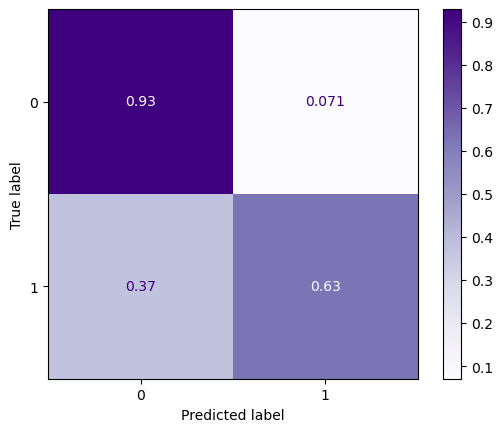

In [17]:
ConfusionMatrixDisplay.from_estimator(
    rf_baseline, X_test, y_test, normalize='true', cmap='Purples'
);

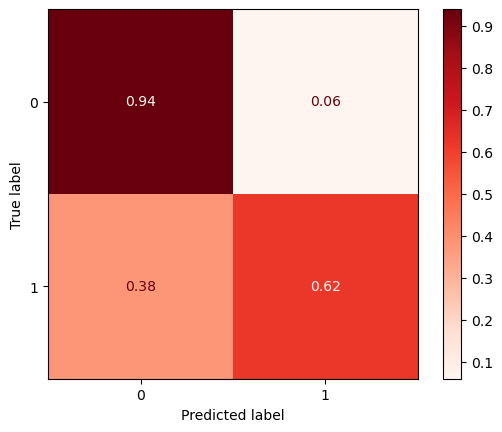

In [18]:
ConfusionMatrixDisplay.from_estimator(
    grid_search, X_test, y_test, normalize='true', cmap='Reds'
);

In [8]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  For a comparison between tree-based ensemble models see the example
 |  :ref:`sp

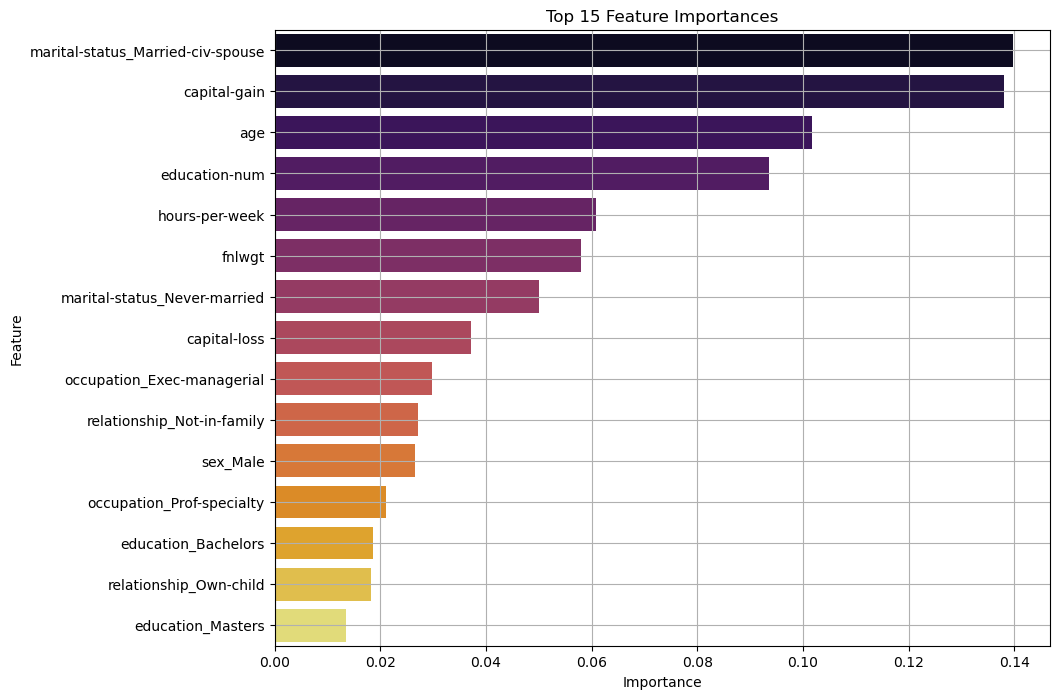

In [21]:
# Plot feature importances (Updated, simplified, 'df version')

feature_importances = pd.DataFrame({
    "Feature": X.columns
    , "Importance": best_rfc.feature_importances_
}).sort_values(
    by="Importance", ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    x="Importance", y="Feature"
    , data=feature_importances.head(15)
    , palette="inferno"
)

plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()
plt.show();

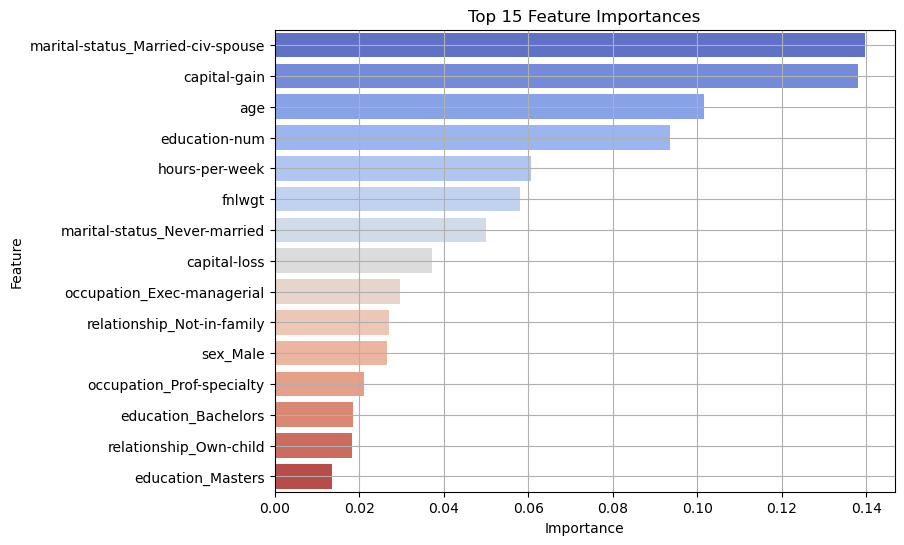

In [22]:
# Feature Importance
importances = grid_search.best_estimator_.feature_importances_
feat_names = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]
top_n = 15

plt.figure(figsize=(8,6))
sns.barplot(
    x=importances[indices][:top_n]
    , y=np.array(feat_names)[indices][:top_n]
    , palette='coolwarm'
)
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()
plt.show();

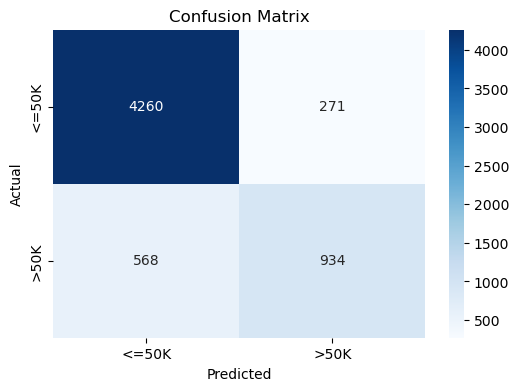

In [22]:
# Confusion Matrix using Seaborn Heatmap

plt.figure(figsize=(6,4))
sns.heatmap(
    cm
    , annot=True
    , fmt='d'
    , cmap='Blues'
    , xticklabels=['<=50K', '>50K']
    , yticklabels=['<=50K', '>50K']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

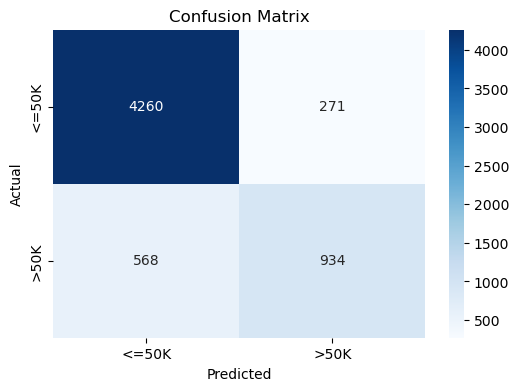

In [23]:
# Confusion Matrix using Seaborn Heatmap

plt.figure(figsize=(6,4))
sns.heatmap(
    cm
    , annot=True
    , fmt='d'
    , cmap='Blues'
    , xticklabels=['<=50K', '>50K']
    , yticklabels=['<=50K', '>50K']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

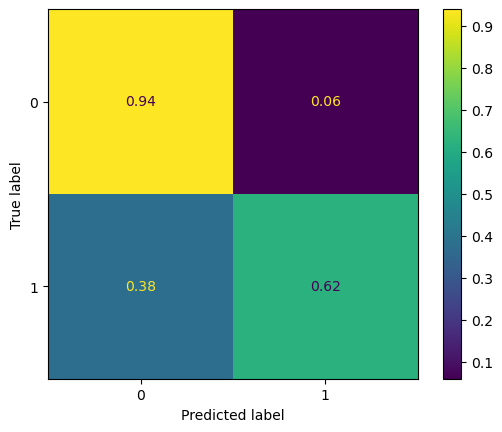

In [27]:
# Confusion Matrix normalized (ratio/ percentage vs. raw values)

ConfusionMatrixDisplay.from_estimator(
    grid_search, X_test, y_test, normalize='true'
);

In [ ]:
# More ingo on the UC Irvine ML (Data) Repo
'''
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 

# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
X.shape, y.shape
'''